# Auto Insurance Claims Fruad Prediction

This solution predicts Insurance Claims Fruad based on factors such as policy_report_available, collision_type, witnesses etc. using a trainable ML model. 

## Contents

1. Prequisites
2. Data Dictionary
3. Import Libraries
4. Load Input Data
5. Create Model
6. Predict Test Datapoints
7. Saving Prediction

## Prerequisites

To run this notebook you need to have install following packages:

- `pandas` to read/save csv files.
- `imblearn` to train model on imbalanced data.
- `sklearn` for base estimator.
- `matplotlib`, `seaborn` for plotting.

## Data Dictionary

- The input has to be a '.csv' file with 'utf-8' encoding. 
- PLEASE NOTE: If your input .csv file is not 'utf-8' encoded, model will not perform as expected.
- Required Features: `months_as_customer`, `age`, `policy_state`, `policy_csl`, `policy_deductable`, `policy_annual_premium`, `umbrella_limit`, `insured_zip`, `insured_sex`, `insured_education_level`, `insured_occupation`, `insured_hobbies`, `insured_relationship`, `capital-gains`, `capital-loss`, `incident_type`, `collision_type`, `incident_severity`, `authorities_contacted`, `incident_state`, `incident_city`, `incident_hour_of_the_day`, `number_of_vehicles_involved`, `property_damage`, `bodily_injuries`, `witnesses`, `police_report_available`, `total_claim_amount`, `injury_claim`, `property_claim`, `vehicle_claim`, `auto_make`, `auto_year`, `fraud_reported`, `incident_month`, `incident_day`.

## Importing Libraries

In [2]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Load Input Data

In [4]:
# let's import the data
train_df = pd.read_csv('data/insurance fraud claims.csv')
train_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
train_df.shape

(1000, 40)

In [6]:
train_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
# Check missing values.

train_df.isnull().sum() 

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
train_df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
# checking unique values
train_df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

## EDA

### Fraudulent Report

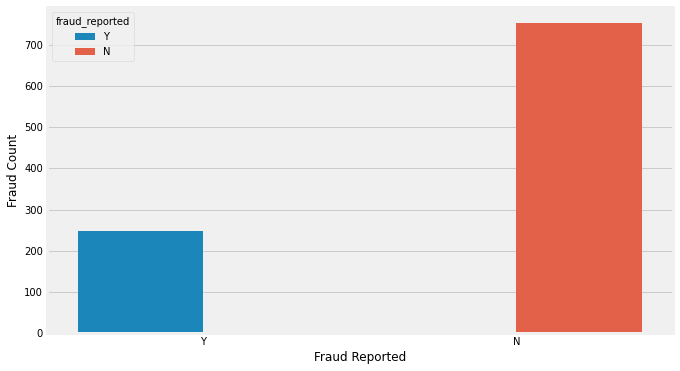

In [10]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='fraud_reported', data=train_df, hue='fraud_reported')
ax.set_xlabel('Fraud Reported')
ax.set_ylabel('Fraud Count')
plt.show()

### States involved

Text(0.5, 0, 'Incident State')

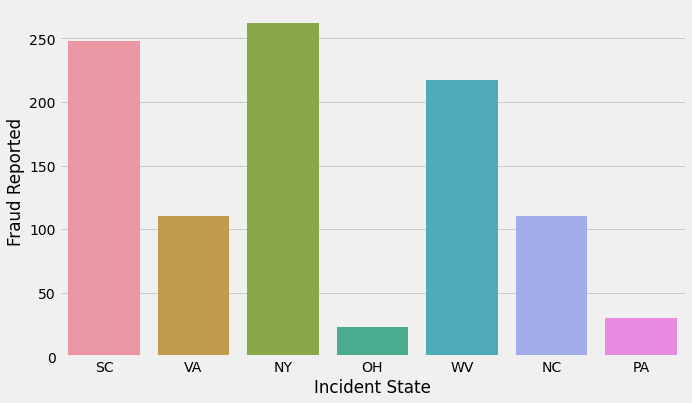

In [11]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=train_df)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident State')

<Figure size 1152x720 with 0 Axes>

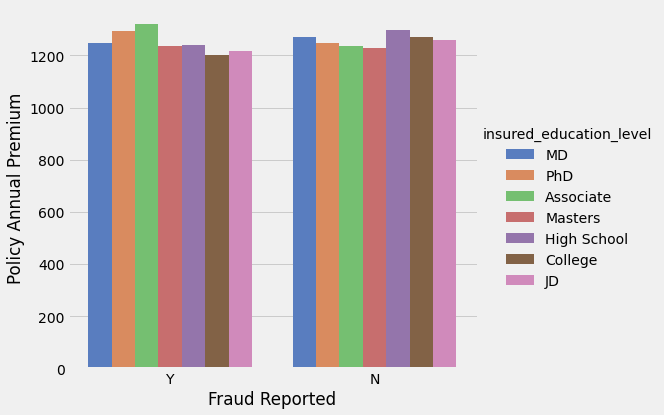

In [12]:
fig = plt.figure(figsize=(16,10))
ax = sns.catplot(x='fraud_reported', y='policy_annual_premium',hue='insured_education_level', data=train_df,
                    kind="bar", errorbar=None, palette="muted",height=6, legend=True, aspect=1.2) 

ax.set_axis_labels("Fraud Reported", "Policy Annual Premium")

plt.show()

### Incident Types

Text(0.5, 0, 'Incident Type')

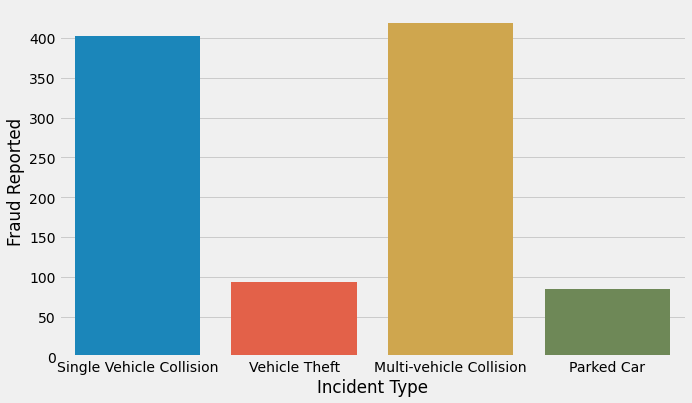

In [13]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_type', data=train_df)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident Type')

In [14]:
# Column _c39 has all values missing, so we will drop this column.
# We will also drop some of the other irrelevant columns which has no relation to fraud: "auto_model", "policy_bind_date", 
# policy_state','policy_csl', 'incident_date', 'incident_state', 'incident_city' and 'incident_location.

In [15]:
data = train_df.drop(["_c39", "auto_model", "policy_bind_date", "policy_state", "incident_date",
               "incident_state", "incident_city", "incident_location", "policy_csl"], axis=1)

In [16]:
data.shape

(1000, 31)

### Feature Selection

In [17]:
corr = data.corr()
corr

/tmp/ipykernel_259/2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


/tmp/ipykernel_259/2963277272.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


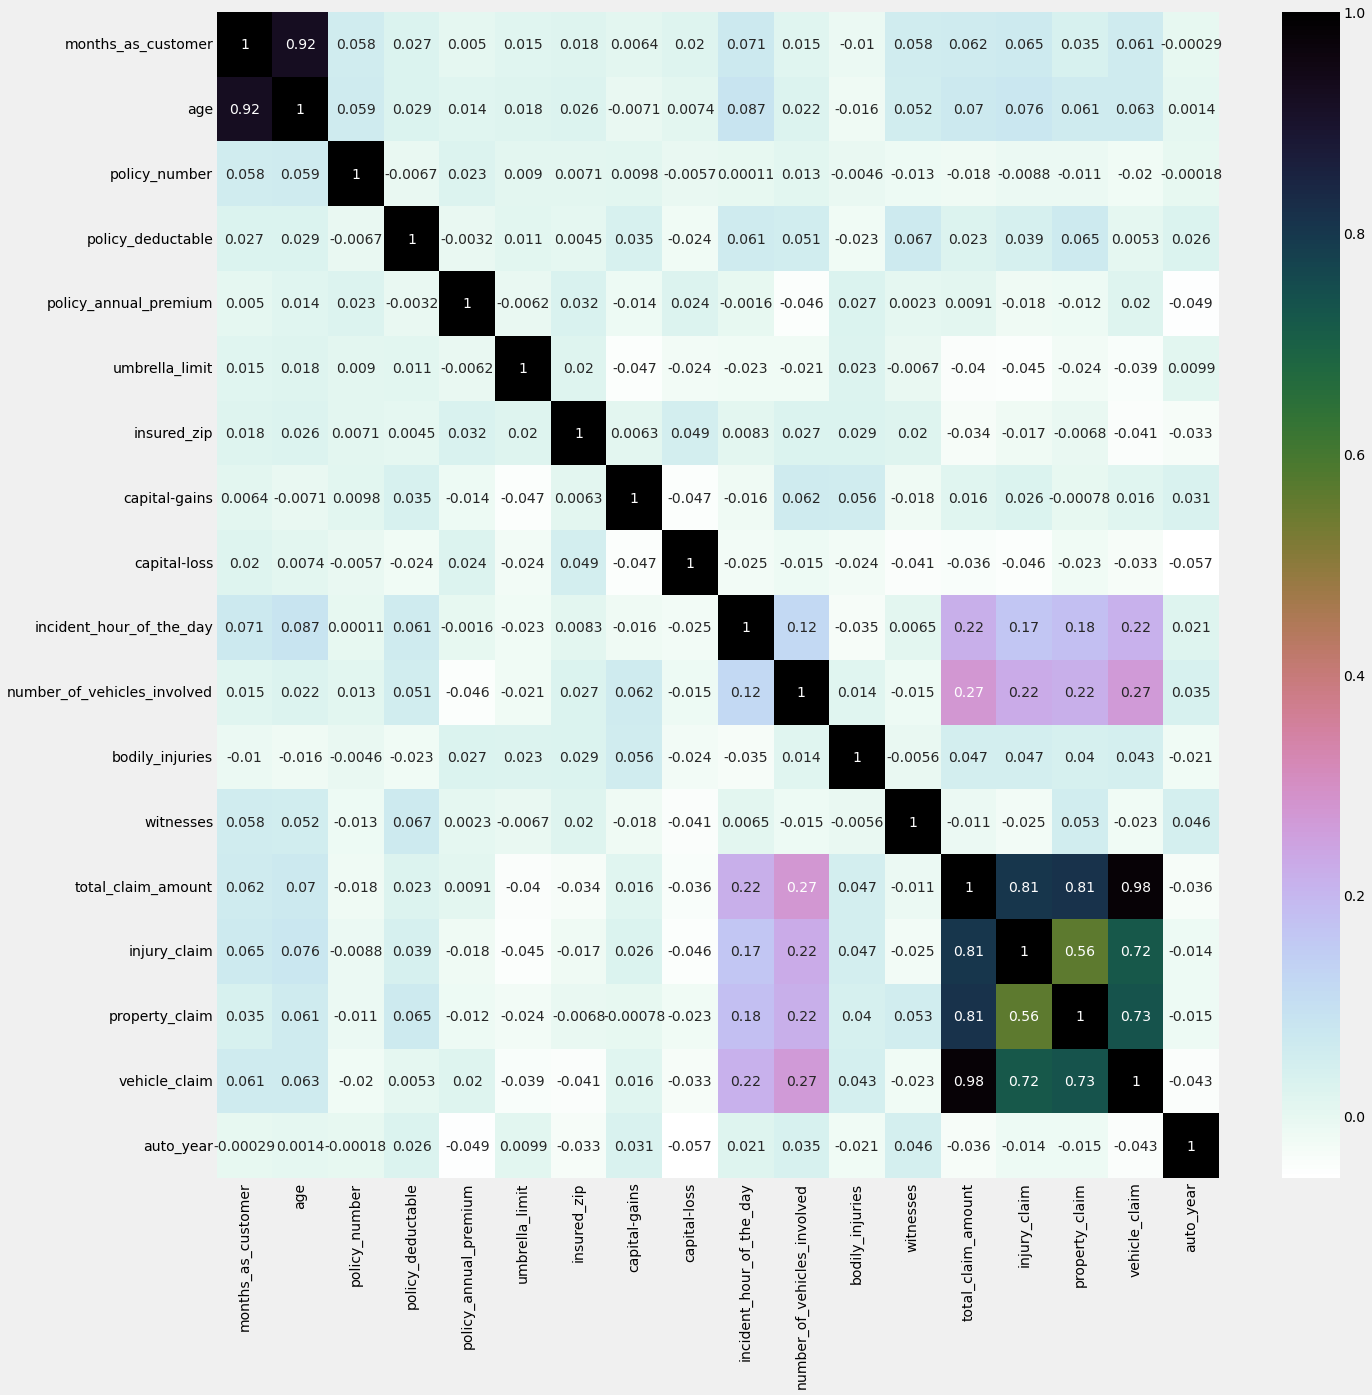

In [18]:
# corelation plot for all the features of the dataset
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(),
            annot=True,
            cmap='cubehelix_r')
plt.show()

In [19]:
# I will drop the columns which have high correlation with other independent features but less correlation with target variable.
data = data.drop(["age", "injury_claim", "property_claim", "total_claim_amount"], axis=1)

In [20]:
data.shape

(1000, 27)

In [21]:
X = data.drop(['fraud_reported', 'capital-loss', 'policy_number', 'policy_annual_premium', 'capital-gains','insured_zip','insured_sex',
               'insured_education_level', 'insured_occupation', 'insured_relationship','incident_hour_of_the_day','auto_make','auto_year','property_damage'], axis=1)

In [22]:
X.shape

(1000, 13)

In [23]:
X.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'insured_hobbies', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'police_report_available', 'vehicle_claim'],
      dtype='object')

In [24]:
# dataframe with columns that I will use for predicting fraud.

data_req = pd.read_csv('data/data_req.csv')

In [25]:
data_req.dtypes

insured_hobbies_new            object
collision_type_new             object
months_as_customer_groups      object
policy_deductable               int64
incident_severity              object
vehicle_claim_groups           object
umbrella_limit                  int64
number_of_vehicles_involved     int64
bodily_injuries                 int64
witnesses                       int64
incident_type                  object
authorities_contacted          object
police_report_available_new    object
dtype: object

In [26]:
# First converting the categorical columns to object data type.

cat_cols = ['months_as_customer_groups', 'vehicle_claim_groups']
for col in cat_cols:
    data_req[col] = data_req[col].astype('object')
    

In [27]:
data_req.dtypes

insured_hobbies_new            object
collision_type_new             object
months_as_customer_groups      object
policy_deductable               int64
incident_severity              object
vehicle_claim_groups           object
umbrella_limit                  int64
number_of_vehicles_involved     int64
bodily_injuries                 int64
witnesses                       int64
incident_type                  object
authorities_contacted          object
police_report_available_new    object
dtype: object

### Encoding of categorical columns

In [28]:
# label endcoding for the object datatypes.

In [29]:
obj_features = ['insured_hobbies_new', 'collision_type_new', 'months_as_customer_groups', 'incident_severity',
'vehicle_claim_groups', 'incident_type', 'authorities_contacted' ,'police_report_available_new']

In [30]:
for col in obj_features:
    if (data_req[col].dtype == 'object'):
        le = preprocessing.LabelEncoder()
        le = le.fit(data_req[col])
        data_req[col] = le.transform(data_req[col])
        print('Completed Label encoding on', col)

Completed Label encoding on insured_hobbies_new
Completed Label encoding on collision_type_new
Completed Label encoding on months_as_customer_groups
Completed Label encoding on incident_severity
Completed Label encoding on vehicle_claim_groups
Completed Label encoding on incident_type
Completed Label encoding on authorities_contacted
Completed Label encoding on police_report_available_new


In [31]:
# Feature Scaling.

sc = StandardScaler()
data_req_scaled = sc.fit_transform(data_req)

In [32]:
# fraud_reported is our target column. We will convert it to 1 and 0 and build the target dataframe.
train_df['fraud_reported'] = train_df['fraud_reported'].str.replace('Y', '1')
train_df['fraud_reported'] = train_df['fraud_reported'].str.replace('N', '0')
train_df['fraud_reported'] = train_df['fraud_reported'].astype(int)
data_target = train_df['fraud_reported']

### Splitting data into train and test

In [33]:
x_train, x_test, y_train, y_test = train_test_split(data_req_scaled, data_target, random_state = 1)

In [34]:
print('x_train:', x_train.shape, 'x_test:', x_test.shape, 'y_train:', y_train.shape, 'y_test:', y_test.shape )

x_train: (750, 13) x_test: (250, 13) y_train: (750,) y_test: (250,)


## Create Model

**Bagging Classifier**

In [35]:
# Random Forest with Bagging Classifier                 

model = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 0)

model.fit(x_train, y_train)

BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                          random_state=0)

## Predict Test Datapoints

In [36]:
# predictions = model.predict(test_df)
prediction = model.predict(x_test)

In [37]:

score = model.score(x_test, y_test)
print(score)
print()
print(classification_report(y_test, prediction))

0.868

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       180
           1       0.71      0.89      0.79        70

    accuracy                           0.87       250
   macro avg       0.83      0.87      0.85       250
weighted avg       0.88      0.87      0.87       250

